Project: House Price Prediction 

Main steps include:
	1: Importing Libraries
    2: Data Cleaning
    3: Visualization and EDA
    4: Model Building
    5: Summary

In [95]:
# Standard Data Analysis and Data Wrangling
import numpy as np
import pandas as pd

# Data Visualization Libraries

import matplotlib.pyplot as plt
import seaborn as sns

# Various Ml models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
/#from XGBoost import XGBRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor

#Splitting Data into Training and Testing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Cross Validation

from sklearn.model_selection import cross_val_score

#Metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

#Maps for Visualization 

#import folium


# Formatting

pd.set_option('display.max_columns',None)


#warnings

#from warnings import simplefilter
#from sklearn.exceptions import ConvergenceWarning
#simplefilter("ignore",category=ConvergencecWarning)

!pip install folium
import folium

!pip install xgboost
import xgboost
from xgboost import XGBRegressor

Importing Data

In [3]:
df=pd.read_csv("F:\\Internship\\Dataset\\kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.head().T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000,20150218T000000
price,221900.0,538000.0,180000.0,604000.0,510000.0
bedrooms,3,3,2,4,3
bathrooms,1.0,2.25,1.0,3.0,2.0
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1.0,2.0,1.0,1.0,1.0
waterfront,0,0,0,0,0
view,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Data Cleaning

In [6]:
clean_date=df.date.apply(lambda x: x.split('T')[0])
clean_date

0        20141013
1        20141209
2        20150225
3        20141209
4        20150218
           ...   
21608    20140521
21609    20150223
21610    20140623
21611    20150116
21612    20141015
Name: date, Length: 21613, dtype: object

In [7]:
df['date']=clean_date
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Convert date column to pandas datatime format

In [8]:
df['date']=pd.to_datetime(df['date'], format = '%Y/%m/%d')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Price Column Convert to integers

In [9]:
df.price=df.price.astype(np.int64)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  int64         
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [11]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


:
    :
        :
            Check for Outliers
            :
                :
                    :

In [12]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Select Columns to plot

In [13]:
cols_to_plot=df[['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]

Graph for <built-in method capitalize of str object at 0x000001EF49FE7770> : Total=21436 


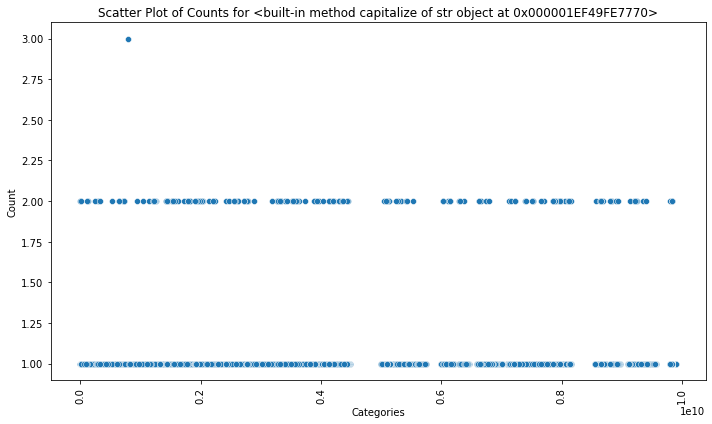

Graph for <built-in method capitalize of str object at 0x000001EF49FE7EB0> : Total=372 


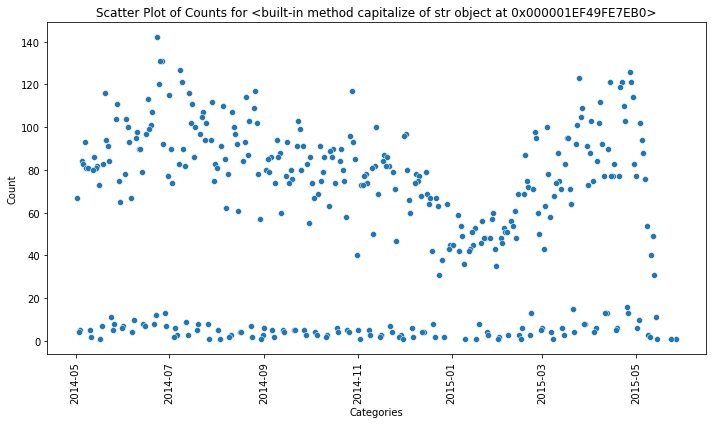

Graph for <built-in method capitalize of str object at 0x000001EF49FE7EF0> : Total=4028 


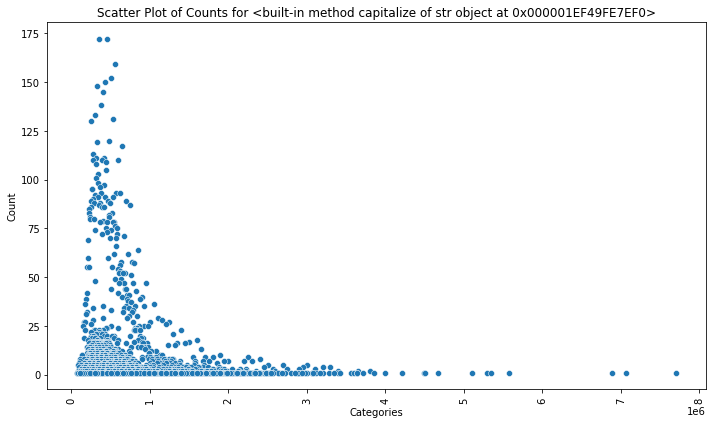

Graph for <built-in method capitalize of str object at 0x000001EF49FE7F30> : Total=13 


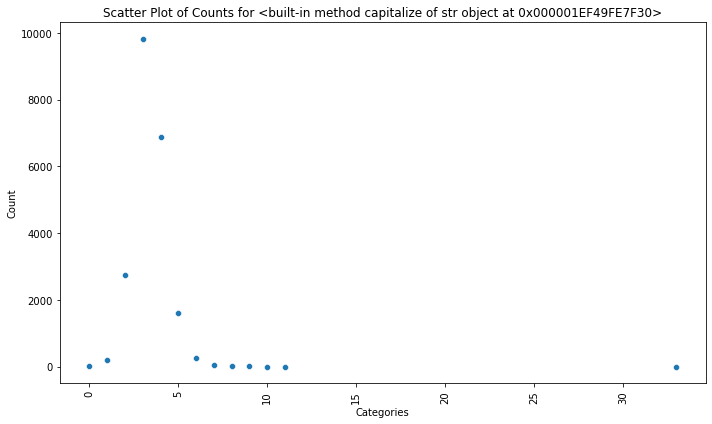

Graph for <built-in method capitalize of str object at 0x000001EF49FE7F70> : Total=30 


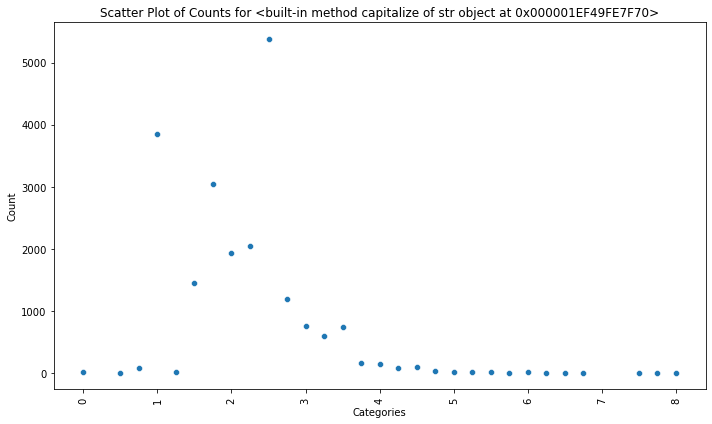

Graph for <built-in method capitalize of str object at 0x000001EF49FEF030> : Total=1038 


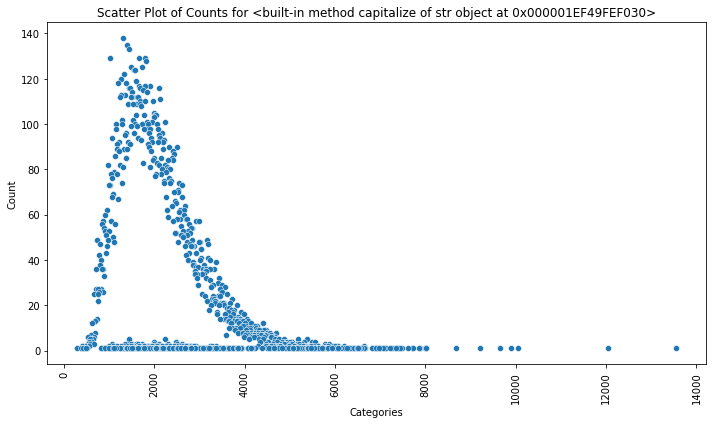

Graph for <built-in method capitalize of str object at 0x000001EF49FEF070> : Total=9782 


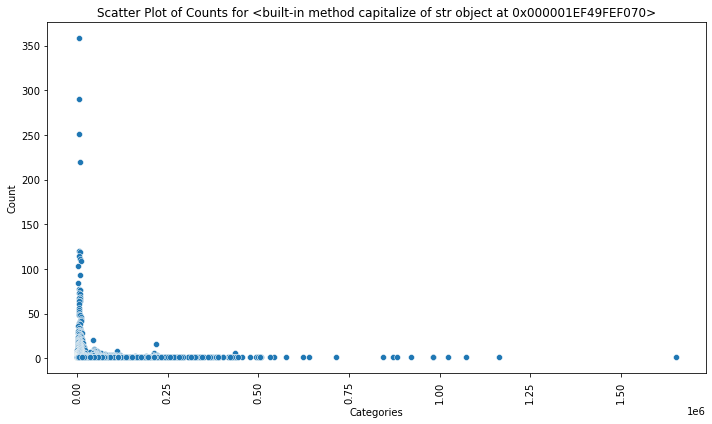

Graph for <built-in method capitalize of str object at 0x000001EF49FEF0B0> : Total=6 


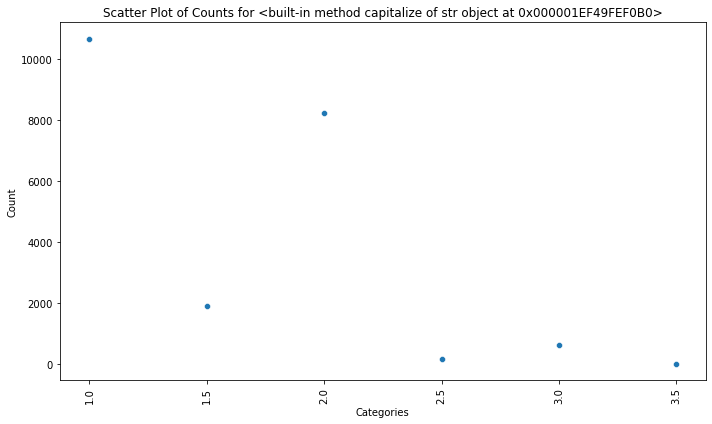

Graph for <built-in method capitalize of str object at 0x000001EF49FEF0F0> : Total=2 


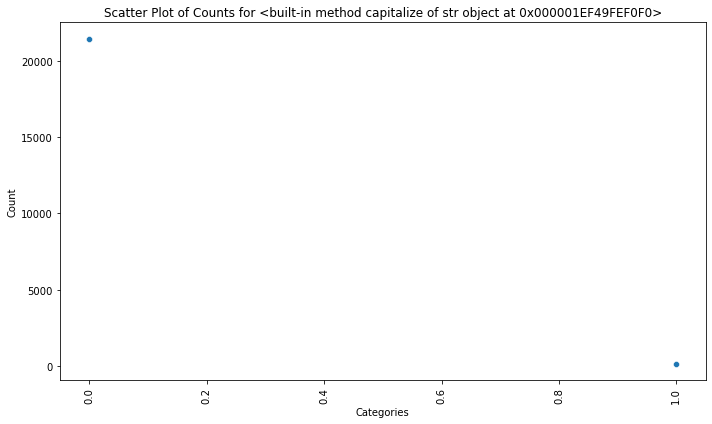

Graph for <built-in method capitalize of str object at 0x000001EF49FE7FB0> : Total=5 


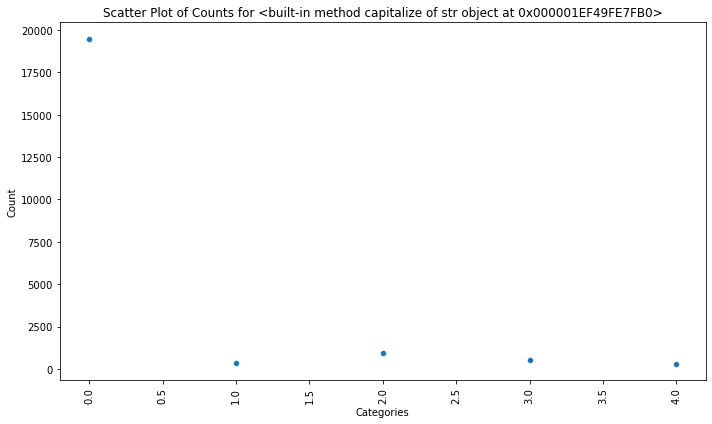

Graph for <built-in method capitalize of str object at 0x000001EF49FEF130> : Total=5 


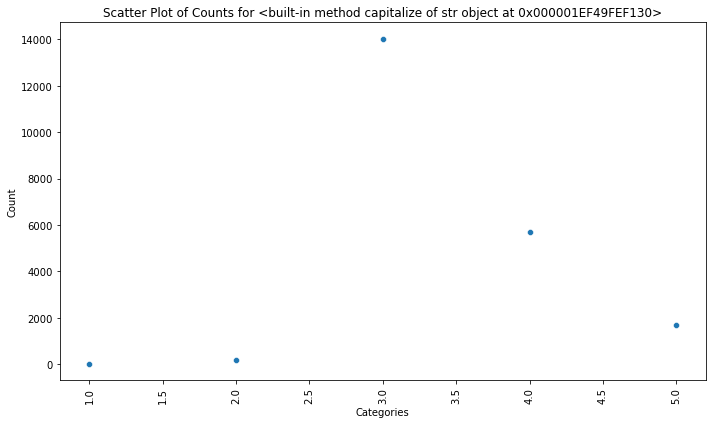

Graph for <built-in method capitalize of str object at 0x000001EF49FEF170> : Total=12 


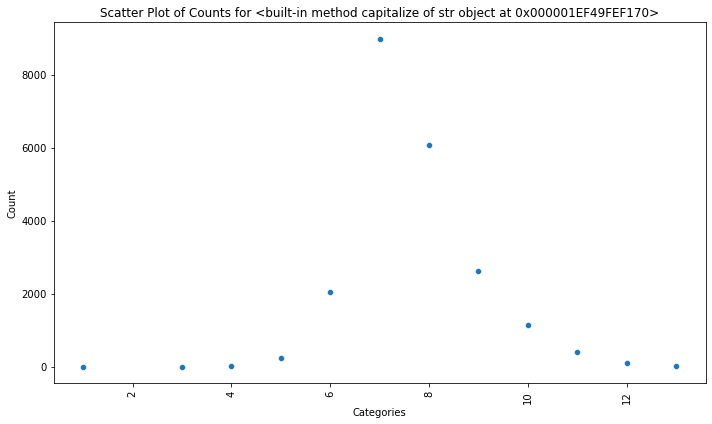

Graph for <built-in method capitalize of str object at 0x000001EF49FEF1B0> : Total=946 


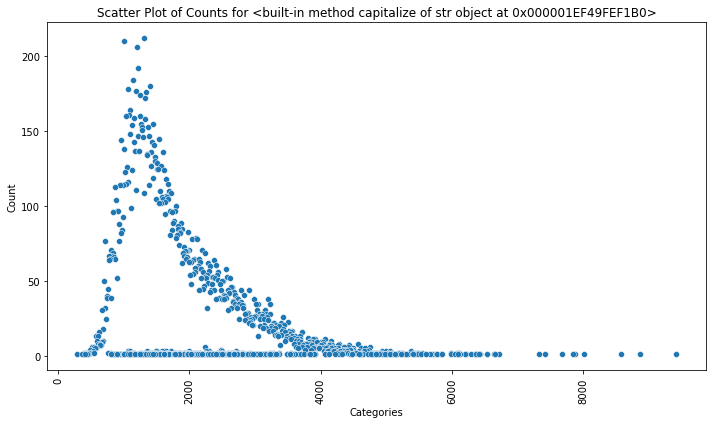

Graph for <built-in method capitalize of str object at 0x000001EF49FEF1F0> : Total=306 


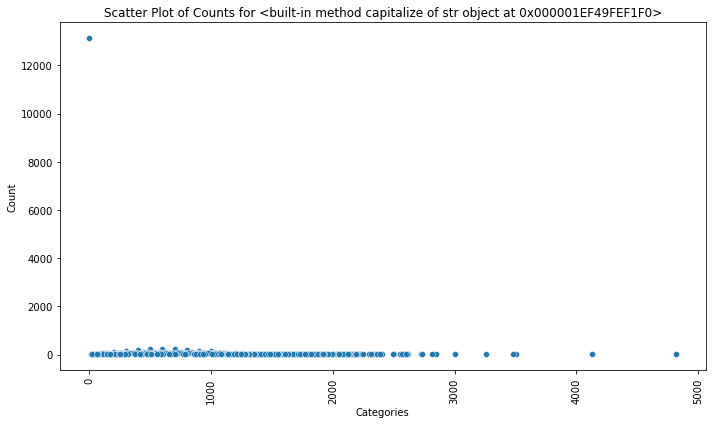

Graph for <built-in method capitalize of str object at 0x000001EF49FEF230> : Total=116 


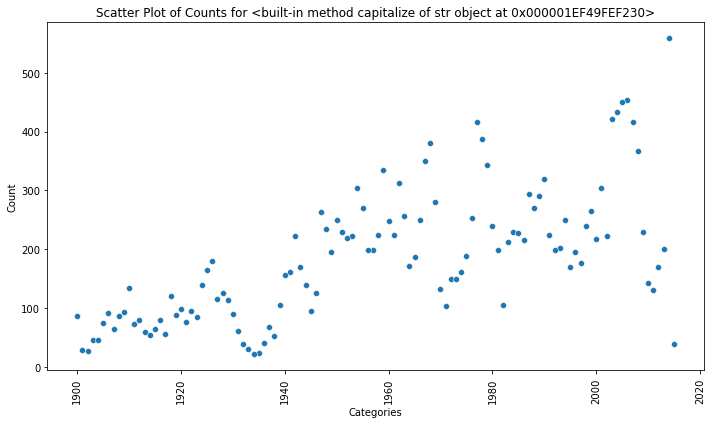

Graph for <built-in method capitalize of str object at 0x000001EF49FEF270> : Total=70 


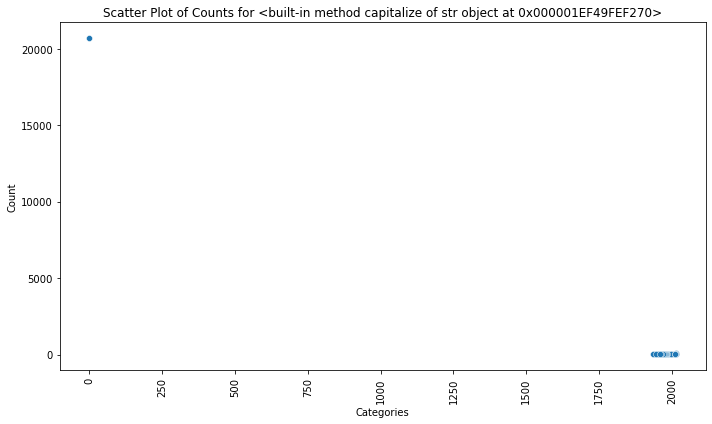

Graph for <built-in method capitalize of str object at 0x000001EF49FEF2B0> : Total=70 


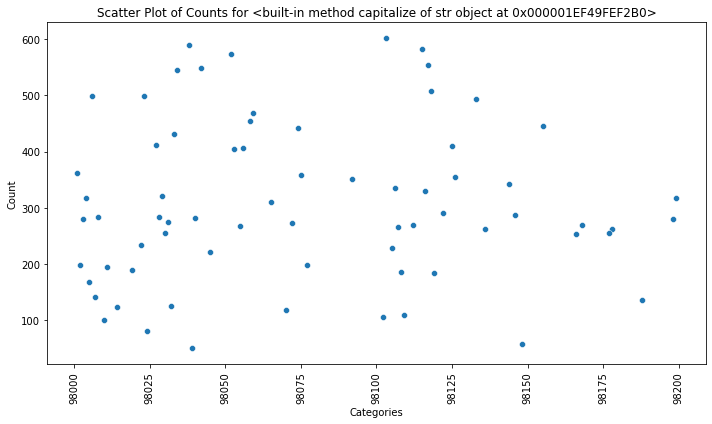

Graph for <built-in method capitalize of str object at 0x000001EF49FEF2F0> : Total=5034 


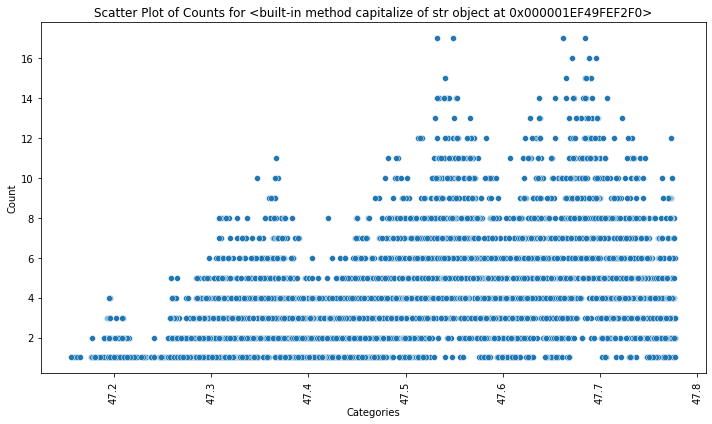

Graph for <built-in method capitalize of str object at 0x000001EF49FEF330> : Total=752 


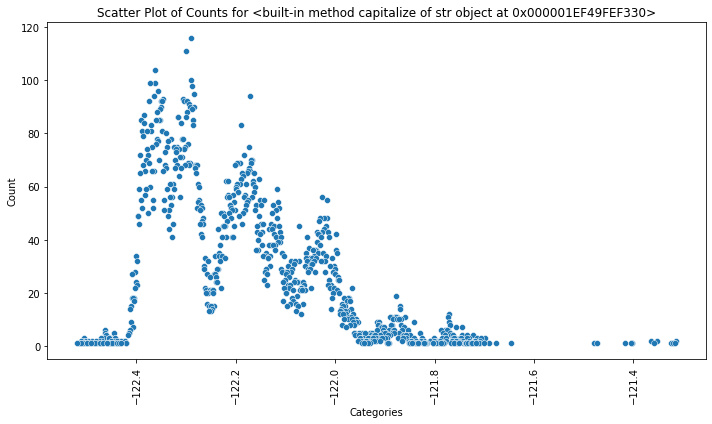

Graph for <built-in method capitalize of str object at 0x000001EF49FEF370> : Total=777 


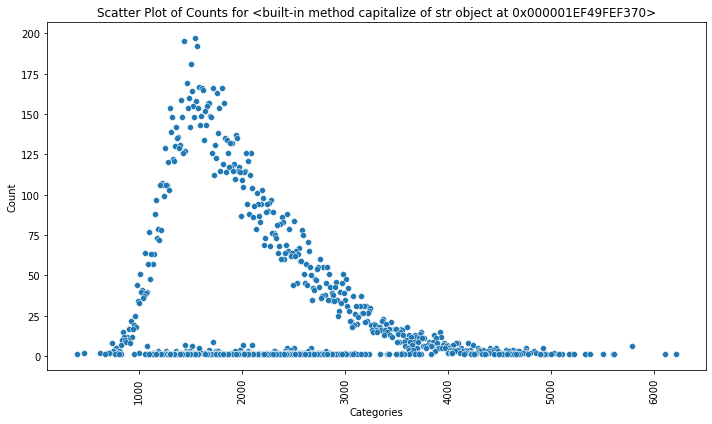

Graph for <built-in method capitalize of str object at 0x000001EF49FEF3B0> : Total=8689 


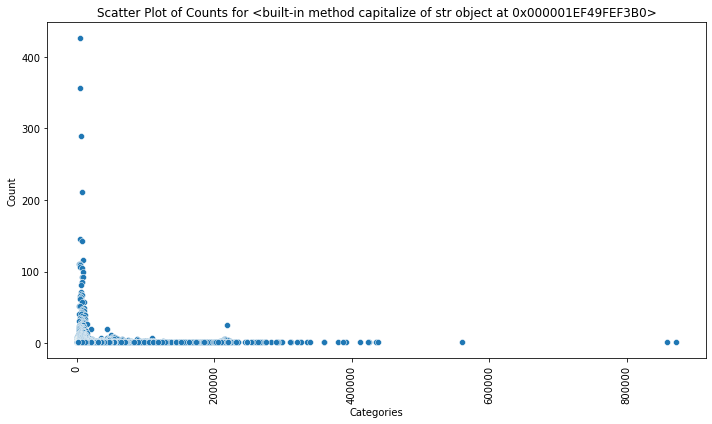

In [14]:
def plot_scatterplots():
    for i in cols_to_plot.columns:
        cat_num = cols_to_plot[i].value_counts()
        cat_names = cat_num.index
        cat_counts = cat_num.values
        print('Graph for {} : Total={} '.format(i.capitalize, len(cat_num)))
        plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
        sns.scatterplot(x=cat_names, y=cat_counts)
        plt.xticks(rotation=90)
        plt.xlabel("Categories")
        plt.ylabel("Count")
        plt.title(f"Scatter Plot of Counts for {i.capitalize}")
        plt.tight_layout()
        plt.show()

plot_scatterplots()

In [15]:
df.loc[df.price > 6000000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3914,9808700762,2014-06-11,7062500,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
7252,6762700020,2014-10-13,7700000,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
9254,9208900037,2014-09-19,6885000,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730


In [16]:
print(len(df.loc[df.price > 4000000]))
df.loc[df.price > 4000000]

11


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1164,1247600105,2014-10-20,5110800,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
1315,7558700030,2015-04-13,5300000,6,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1448,8907500070,2015-04-13,5350000,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
2626,7738500731,2014-08-15,4500000,5,5.50,6640,40014,2.0,1,4,3,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
3914,9808700762,2014-06-11,7062500,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
4411,2470100110,2014-08-04,5570000,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
7252,6762700020,2014-10-13,7700000,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
8092,1924059029,2014-06-17,4668000,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
8638,3835500195,2014-06-18,4489000,4,3.00,6430,27517,2.0,0,0,3,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592
9254,9208900037,2014-09-19,6885000,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730


In [17]:
# Drop homes over $4mil
df = df[df.price < 4000000]
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Bedroom outlieres

In [18]:
# 11 and 33 bedroom homes are clearly anomalies as they only have 1 listing each. 10 bedroom homes are also very rare with 3 listings. 
# remove all homes with 10, 11, and 33 bedrooms. 

df.bedrooms.value_counts()

3     9824
4     6880
2     2760
5     1594
6      269
1      199
7       38
0       13
8       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64

In [19]:
# Drop 10, 11, and 33 bedroom homes

df = df[df.bedrooms < 10]
df[df.bedrooms == 0]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,2014-06-12,1095000,0,0.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
3119,3918400017,2015-02-05,380000,0,0.00,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
3467,1453602309,2014-08-05,288000,0,1.50,1430,1650,3.0,0,0,3,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
4868,6896300380,2014-10-02,228000,0,1.00,390,5900,1.0,0,0,2,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
6994,2954400190,2014-06-24,1295650,0,0.00,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
8477,2569500210,2014-11-17,339950,0,2.50,2290,8319,2.0,0,0,3,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
8484,2310060040,2014-09-25,240000,0,2.50,1810,5669,2.0,0,0,3,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
9773,3374500520,2015-04-29,355000,0,0.00,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,2014-12-23,235000,0,0.00,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
12653,7849202299,2015-02-18,320000,0,2.50,1490,7111,2.0,0,0,3,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675


In [20]:
df = df[df.bedrooms > 0]

Bathroom Outliers

In [21]:
df.bathrooms.value_counts()

2.50    5377
1.00    3851
1.75    3047
2.25    2047
2.00    1929
1.50    1445
2.75    1185
3.00     750
3.50     731
3.25     589
3.75     155
4.00     136
4.50      99
4.25      79
0.75      71
4.75      23
5.00      20
5.25      11
1.25       9
5.50       8
6.00       4
0.50       4
0.00       3
5.75       3
6.25       2
6.50       2
7.50       1
6.75       1
8.00       1
Name: bathrooms, dtype: int64

In [22]:
df[df.bathrooms==0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1149,3421079032,2015-02-17,75000,1,0.0,670,43377,1.0,0,0,3,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
5832,5702500050,2014-11-04,280000,1,0.0,600,24501,1.0,0,0,2,3,600,0,1950,0,98045,47.5316,-121.749,990,22549
10481,203100435,2014-09-18,484000,1,0.0,690,23244,1.0,0,0,4,7,690,0,1948,0,98053,47.6429,-121.955,1690,19290


In [23]:
df=df[df.bathrooms>0]

In [24]:
df.bathrooms.value_counts()

2.50    5377
1.00    3851
1.75    3047
2.25    2047
2.00    1929
1.50    1445
2.75    1185
3.00     750
3.50     731
3.25     589
3.75     155
4.00     136
4.50      99
4.25      79
0.75      71
4.75      23
5.00      20
5.25      11
1.25       9
5.50       8
0.50       4
6.00       4
5.75       3
6.25       2
6.50       2
7.50       1
8.00       1
6.75       1
Name: bathrooms, dtype: int64

In [25]:
df = df[df.bathrooms != 6.75]
df = df[df.bathrooms != 7.50]
df = df[df.bathrooms != 8.00]
df = df[df.bathrooms != 6.50]
df = df[df.bathrooms != 6.25]

In [26]:
df.bathrooms.value_counts()

2.50    5377
1.00    3851
1.75    3047
2.25    2047
2.00    1929
1.50    1445
2.75    1185
3.00     750
3.50     731
3.25     589
3.75     155
4.00     136
4.50      99
4.25      79
0.75      71
4.75      23
5.00      20
5.25      11
1.25       9
5.50       8
6.00       4
0.50       4
5.75       3
Name: bathrooms, dtype: int64

sqft_living Outliers

In [27]:
df[df.sqft_living > 12000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


sqft_lot Outliers

In [28]:
df.sqft_lot.value_counts()

5000     358
6000     289
4000     251
7200     220
4800     119
        ... 
4996       1
15233      1
13184      1
2935       1
36862      1
Name: sqft_lot, Length: 9760, dtype: int64

In [29]:
print(len(df[df.sqft_lot > 750000]))
df[df.sqft_lot > 750000]

11


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1719,1020069017,2015-03-27,700000,4,1.00,1300,1651359,1.0,0,3,4,6,1300,0,1920,0,98022,47.2313,-122.023,2560,425581
3949,722069232,2014-09-05,998000,4,3.25,3770,982998,2.0,0,0,3,10,3770,0,1992,0,98058,47.4140,-122.087,2290,37141
4441,3626079040,2014-07-30,790000,2,3.00,2560,982278,1.0,0,0,3,8,2560,0,2004,0,98014,47.6955,-121.861,1620,40946
4540,2522029039,2014-09-29,550000,3,2.00,3650,843309,2.0,0,0,4,7,3650,0,1991,0,98070,47.3627,-122.496,1870,273992
6691,2624089007,2015-03-20,1998000,2,2.50,3900,920423,2.0,0,0,3,12,3900,0,2009,0,98065,47.5371,-121.756,2720,411962
7077,2724079090,2015-01-05,1650000,4,3.25,3920,881654,3.0,0,3,3,11,3920,0,2002,0,98024,47.5385,-121.896,2970,112384
7647,2623069031,2014-05-21,542500,5,3.25,3010,1074218,1.5,0,0,5,8,2010,1000,1931,0,98027,47.4564,-122.004,2450,68825
7769,2323089009,2015-01-19,855000,4,3.50,4030,1024068,2.0,0,0,3,10,4030,0,2006,0,98045,47.4619,-121.744,1830,11700
9714,225079036,2015-01-07,937500,4,4.00,5545,871200,2.0,0,0,3,11,3605,1940,2003,0,98014,47.6760,-121.882,3420,871200
17319,3326079016,2015-05-04,190000,2,1.00,710,1164794,1.0,0,0,2,5,710,0,1915,0,98014,47.6888,-121.909,1680,16730


In [30]:
df = df[df.sqft_lot < 750000]

Sqft above - outliers

In [31]:
df[df['sqft_above'] > 8000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [32]:
df[df.sqft_above > 6500]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
11105,4054530260,2014-06-27,1820000,4,4.50,6640,53330,2.0,0,0,3,12,6640,0,1993,0,98077,47.7283,-122.046,4620,68625
11871,8835800350,2015-01-12,1950000,4,3.25,7420,167869,2.0,0,3,3,12,7420,0,2002,0,98045,47.4548,-121.764,5610,169549
13411,2426039123,2015-01-30,2415000,5,4.75,7880,24250,2.0,0,2,3,13,7880,0,1996,0,98177,47.7334,-122.362,2740,10761
16773,1630700380,2015-01-30,1920000,5,5.75,7730,230868,2.0,0,0,3,12,6660,1070,2004,0,98077,47.7615,-122.084,2660,39292
18594,3023069166,2014-07-08,1135250,5,4.00,7320,217800,2.0,0,0,3,11,7320,0,1992,0,98058,47.4473,-122.086,3270,34500
19858,2524069078,2015-01-22,2700000,4,4.00,7850,89651,2.0,0,0,3,12,7850,0,2006,0,98027,47.5406,-121.982,6210,95832


In [33]:
df = df[df.sqft_above < 6500]

Sqft basement - outliers

In [34]:
df[df.sqft_basement > 3000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10085,7767000060,2014-09-12,1900000,5,4.25,6510,16471,2.0,0,3,4,11,3250,3260,1980,0,98040,47.5758,-122.242,4480,16471
15482,624069108,2014-08-12,3200000,4,3.25,7000,28206,1.0,1,4,4,12,3500,3500,1991,0,98075,47.5928,-122.086,4913,14663


In [35]:
df = df[df.sqft_basement < 3000]

Sqft lot15 - outliers

In [36]:
df[df.sqft_lot15 > 500000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13464,3420069060,2014-11-07,790000,3,2.5,2640,432036,1.5,0,3,3,10,2640,0,1996,0,98022,47.1795,-122.036,1500,560617


In [37]:
df = df[df.sqft_lot15 < 500000]

Graph for <built-in method capitalize of str object at 0x000001EF49FE7EF0> : Total=4004 


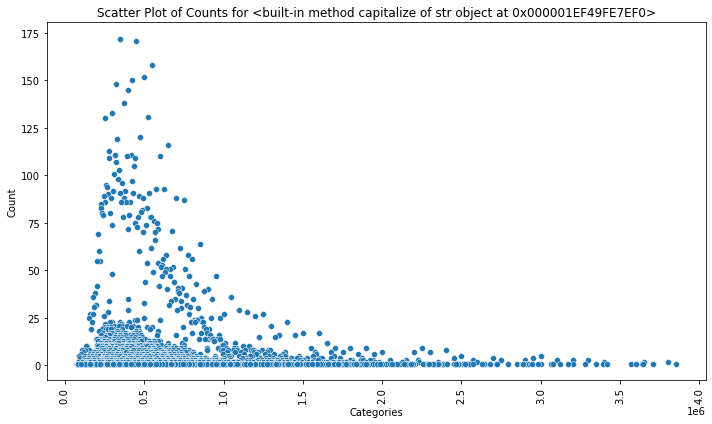

Graph for <built-in method capitalize of str object at 0x000001EF49FE7F30> : Total=9 


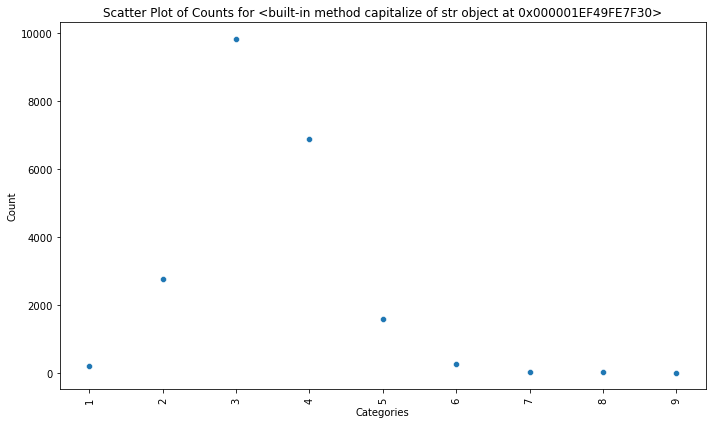

Graph for <built-in method capitalize of str object at 0x000001EF49FE7F70> : Total=23 


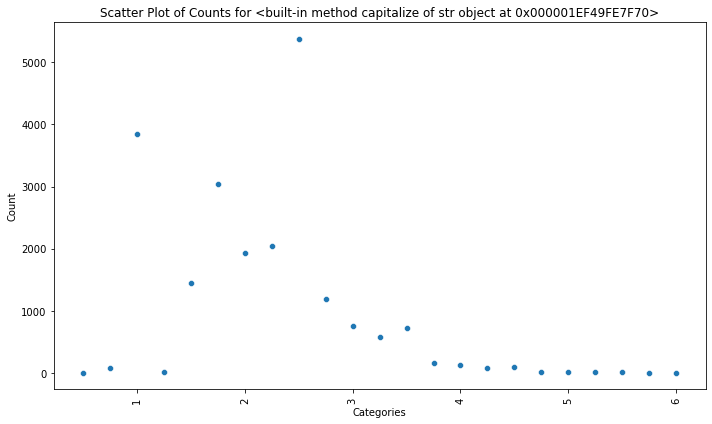

Graph for <built-in method capitalize of str object at 0x000001EF49FEF030> : Total=1007 


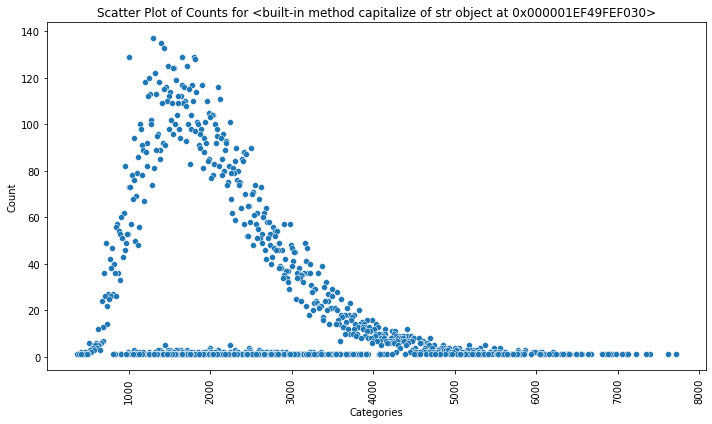

Graph for <built-in method capitalize of str object at 0x000001EF49FEF070> : Total=9743 


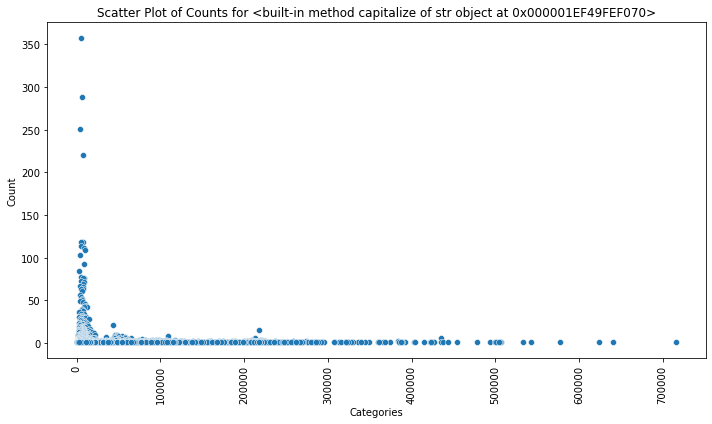

Graph for <built-in method capitalize of str object at 0x000001EF49FEF0B0> : Total=6 


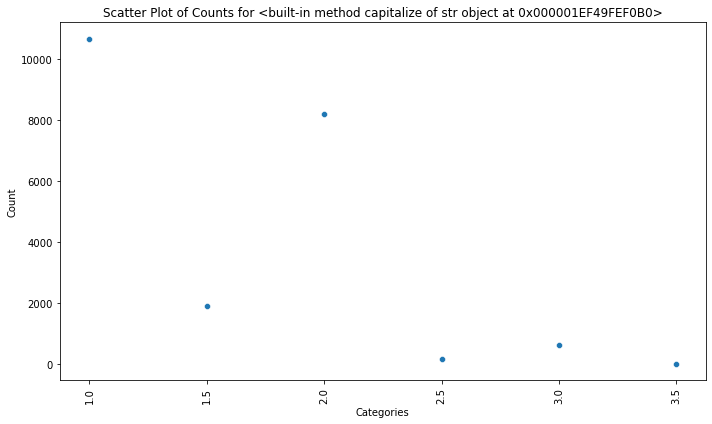

Graph for <built-in method capitalize of str object at 0x000001EF49FEF0F0> : Total=2 


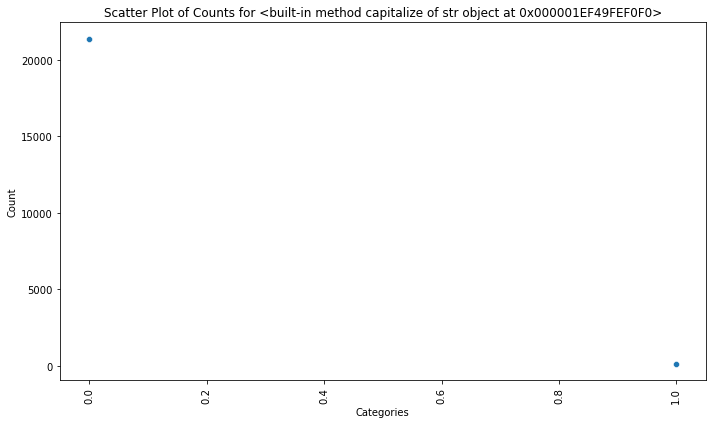

Graph for <built-in method capitalize of str object at 0x000001EF49FE7FB0> : Total=5 


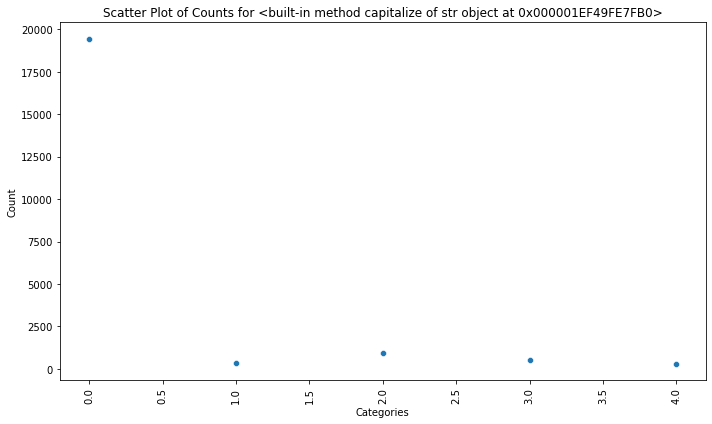

Graph for <built-in method capitalize of str object at 0x000001EF49FEF130> : Total=5 


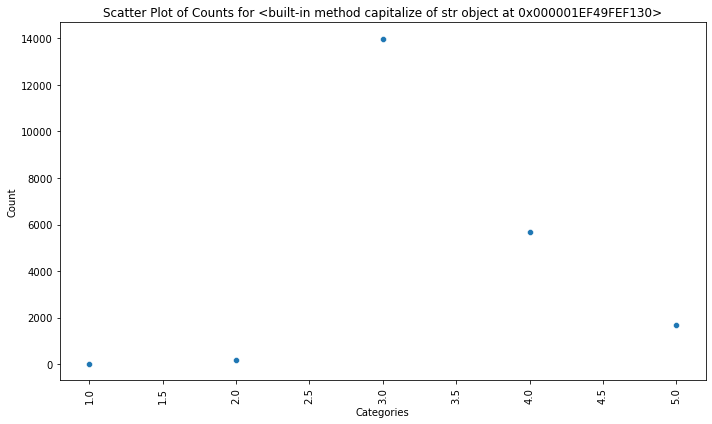

Graph for <built-in method capitalize of str object at 0x000001EF49FEF170> : Total=11 


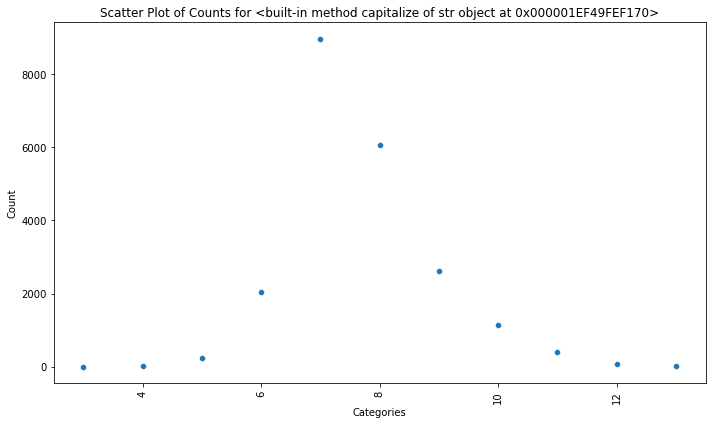

Graph for <built-in method capitalize of str object at 0x000001EF49FEF1B0> : Total=921 


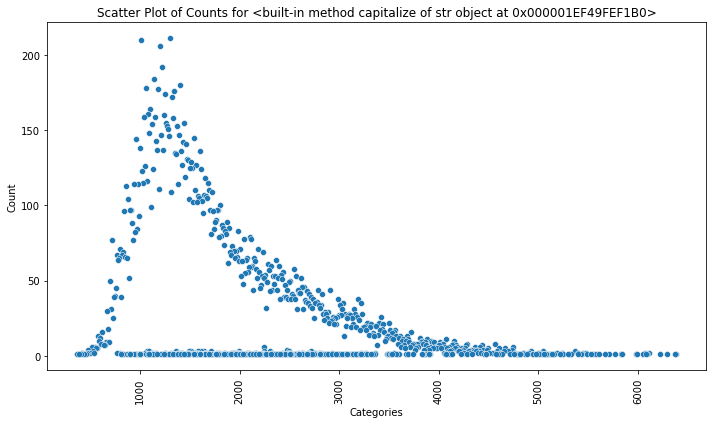

Graph for <built-in method capitalize of str object at 0x000001EF49FEF1F0> : Total=297 


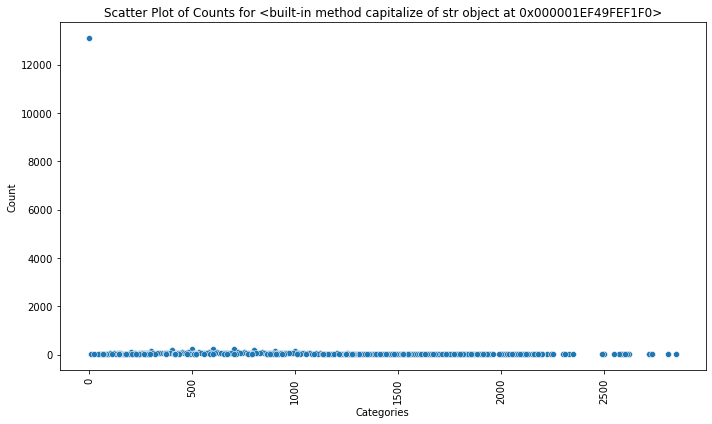

Graph for <built-in method capitalize of str object at 0x000001EF49FEF230> : Total=116 


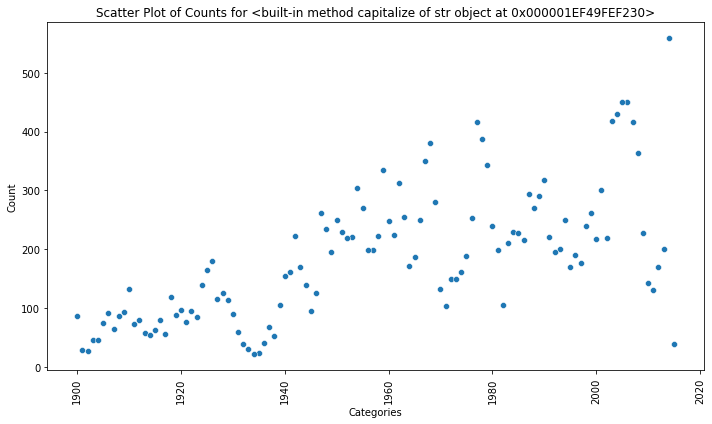

Graph for <built-in method capitalize of str object at 0x000001EF49FEF270> : Total=70 


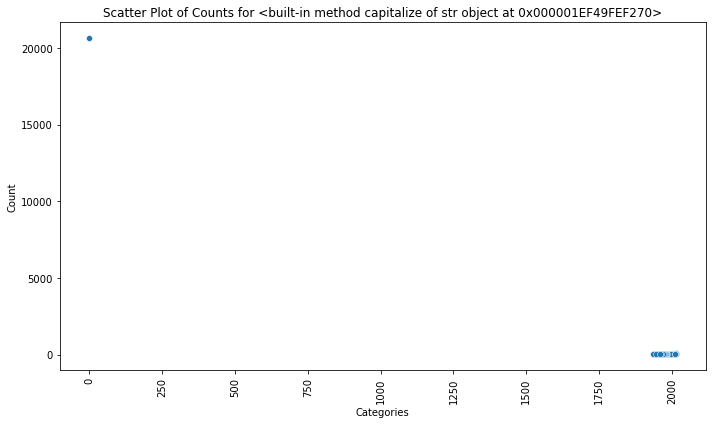

Graph for <built-in method capitalize of str object at 0x000001EF49FEF2B0> : Total=70 


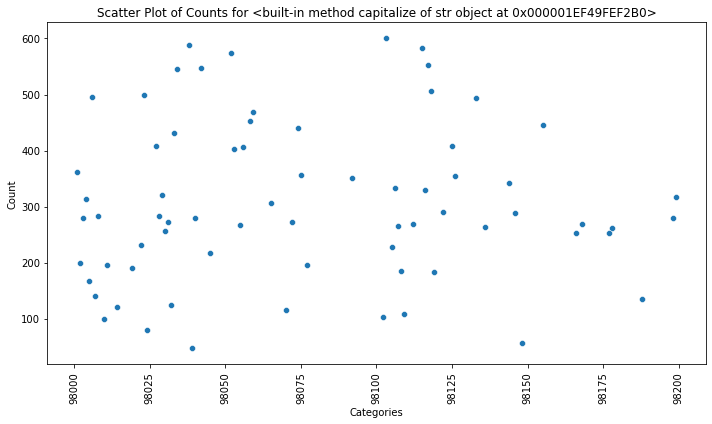

Graph for <built-in method capitalize of str object at 0x000001EF49FEF2F0> : Total=5030 


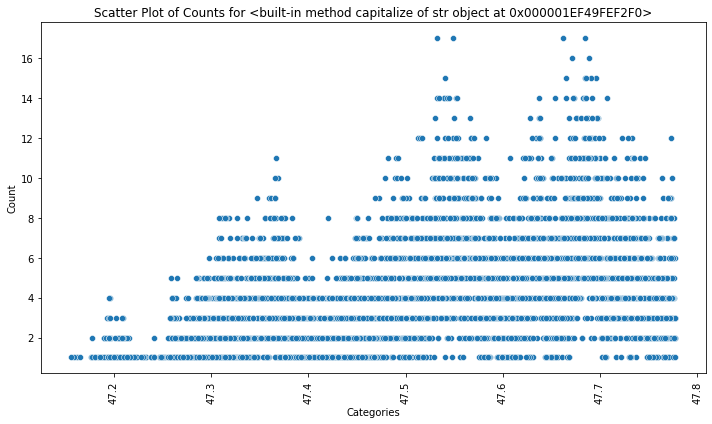

Graph for <built-in method capitalize of str object at 0x000001EF49FEF330> : Total=750 


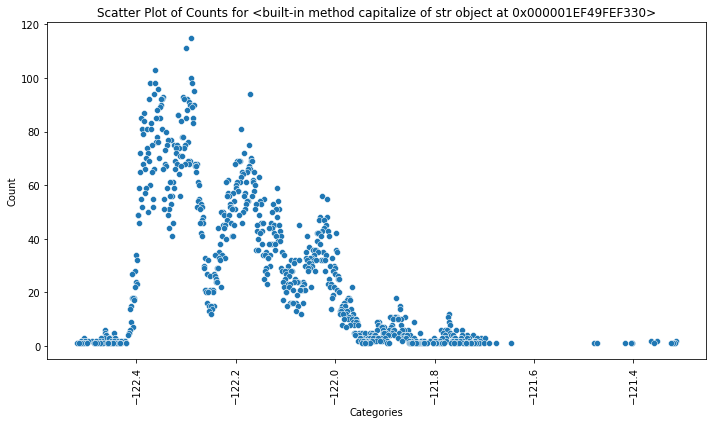

Graph for <built-in method capitalize of str object at 0x000001EF49FEF370> : Total=772 


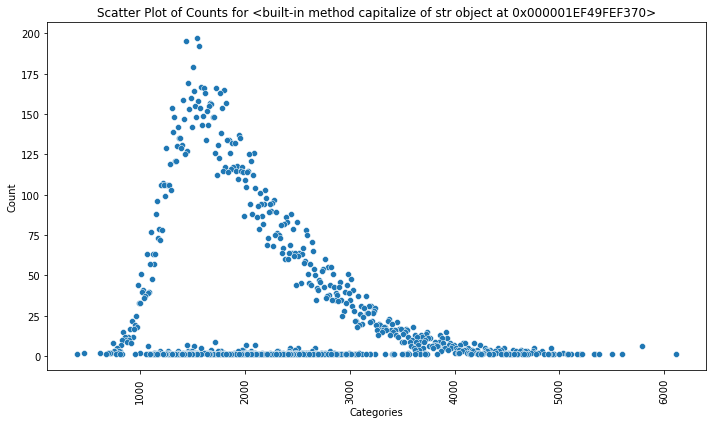

Graph for <built-in method capitalize of str object at 0x000001EF49FEF3B0> : Total=8657 


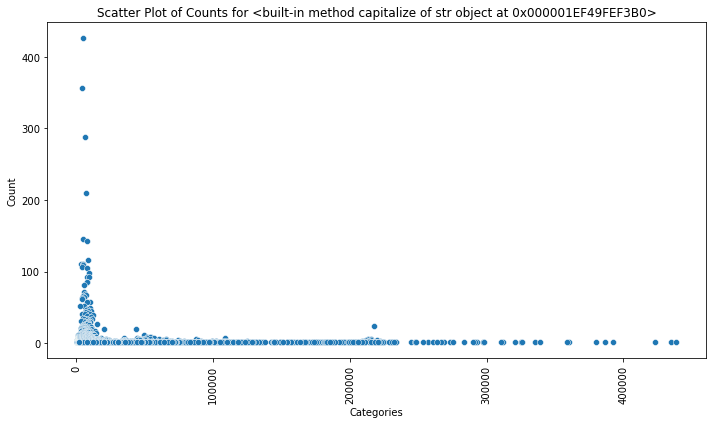

In [38]:
cols_to_plot = df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]


plot_scatterplots()

Visualization and EDA

In [39]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [40]:
df.shape

(21553, 21)

In [41]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.155300e+04,2.155300e+04,21553.000000,21553.000000,21553.000000,21553.000000,21553.000000,21553.000000,21553.000000,21553.000000,21553.000000,21553.000000,21553.000000,21553.000000,21553.000000,21553.000000,21553.000000,21553.000000,21553.000000,21553.000000
mean,4.581916e+09,5.361909e+05,3.368209,2.110855,2071.913701,14504.214541,1.493319,0.007284,0.231801,3.410152,7.652021,1781.956155,289.957547,1970.974528,84.173294,98077.997680,47.560055,-122.214162,1984.265671,12559.526794
std,2.876506e+09,3.448237e+05,0.896611,0.757221,891.005476,33989.314854,0.539569,0.085039,0.761387,0.650661,1.162952,809.093980,437.359978,29.366801,401.155844,53.513115,0.138579,0.140569,681.631241,25317.203450
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.210270e+05,3.000000,1.750000,1420.000000,5040.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904950e+09,4.500000e+05,3.000000,2.250000,1910.000000,7609.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.309100e+09,6.420000e+05,4.000000,2.500000,2550.000000,10639.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678100,-122.125000,2360.000000,10071.000000
max,9.900000e+09,3.850000e+06,9.000000,6.000000,7710.000000,715690.000000,3.500000,1.000000,4.000000,5.000000,13.000000,6380.000000,2850.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6110.000000,438213.000000


House Price Distribution

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


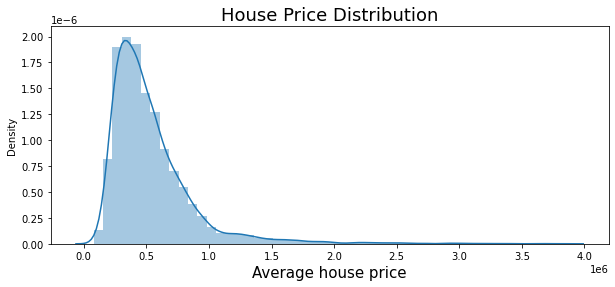

In [42]:
plt.figure(figsize=(10,4))
plt.title("House Price Distribution", size=18)
sns.distplot(df["price"])

plt.xlabel('Average house price', size=15)
plt.show()

House Prices and Waterfront Property

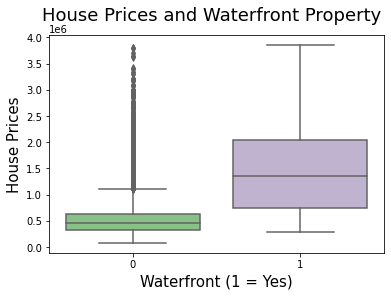

In [43]:
sns.boxplot(x = df['waterfront'], y=df['price'], palette="Accent")
plt.suptitle('House Prices and Waterfront Property', size=18)
plt.xlabel('Waterfront (1 = Yes)', fontsize = 15)
plt.ylabel('House Prices', fontsize = 15)

plt.show()

House Prices and Number of Floors

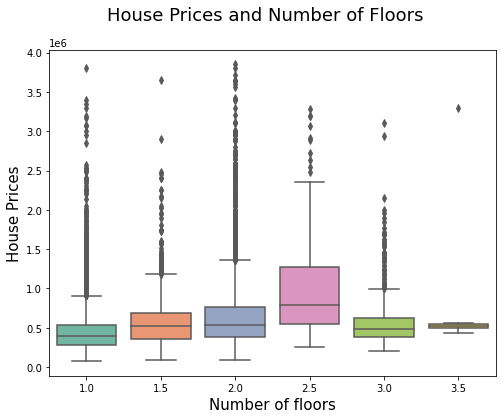

In [44]:
plt.figure(figsize=(8,6))
sns.boxplot(x = df['floors'], y=df['price'], palette="Set2")
plt.suptitle('House Prices and Number of Floors', size=18)
plt.xlabel('Number of floors', fontsize = 15)
plt.ylabel('House Prices', fontsize =15)

plt.show()

In [45]:
df.floors.value_counts()

1.0    10666
2.0     8203
1.5     1908
3.0      609
2.5      160
3.5        7
Name: floors, dtype: int64

In [46]:
# Create a pivot table with floors/yr_built 

pd.pivot_table(df, index='floors', values = 'yr_built').astype(int)

,yr_built
floors,
1.0,1960
1.5,1935
2.0,1990
2.5,1961
3.0,2004
3.5,1990


hypothesis was incorrect. In a way, it's actually the opposite of what I predicted. Houses with 3 floors are on average newer compared to homes with any other number of floors. Let's explore other features.

House Prices and Number of Bathrooms

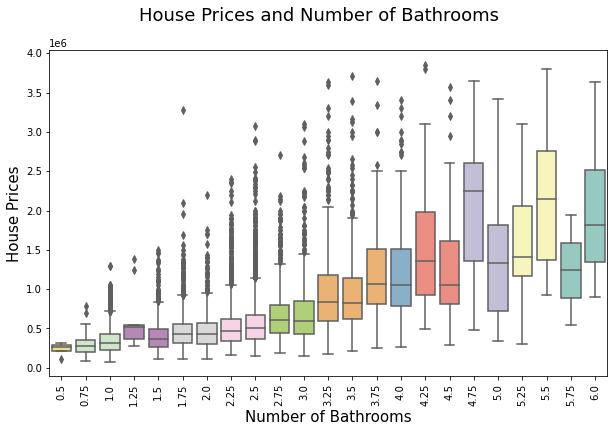

In [47]:
plt.figure(figsize=(10,6))
sns.boxplot(x = df['bathrooms'], y=df['price'], palette="Set3_r")
plt.suptitle('House Prices and Number of Bathrooms', size=18)
plt.xlabel('Number of Bathrooms', fontsize = 15)
plt.ylabel('House Prices', fontsize = 15)
plt.xticks(rotation=90)

plt.show()

House Prices and Grade Rating

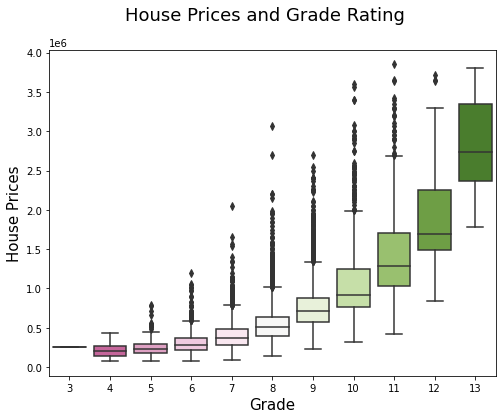

In [48]:
plt.figure(figsize=(8,6))
sns.boxplot(x = df['grade'], y=df['price'], palette="PiYG")
plt.suptitle('House Prices and Grade Rating', size=18)
plt.xlabel('Grade', fontsize = 15)
plt.ylabel('House Prices', fontsize = 15)

plt.show()

In [49]:
df.grade.value_counts()

7     8968
8     6063
9     2614
6     2037
10    1131
11     390
5      241
12      73
4       27
13       8
3        1
Name: grade, dtype: int64

In [50]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Price difference between the most/least expensive homes

In [51]:
# Create a dataframe for the top 5/bottom 5 zipcodes in terms of average price. Then, combine the dataframes. 

pd.options.display.float_format = "{:.2f}".format # Round to 2 decimal places

top = df.groupby('zipcode')['price'].mean().reset_index().sort_values('price', ascending=False)[:5]
bot = df.groupby('zipcode')['price'].mean().reset_index().sort_values('price', ascending=False)[-5:]
combined = pd.concat([top, bot])
combined.sort_values('price', ascending=True, inplace=True)

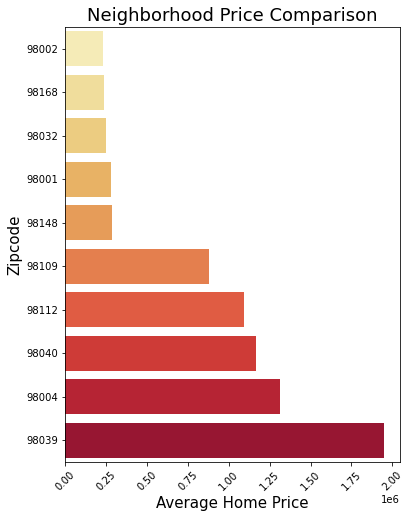

In [52]:
plt.figure(figsize=(6,8))

sns.barplot(x='price', y='zipcode' , order = combined['zipcode'], orient='h', data=combined, palette='YlOrRd')

plt.title('Neighborhood Price Comparison', size=18)
plt.ylabel('Zipcode', size=15)
plt.xlabel('Average Home Price', size=15)
plt.xticks(rotation=45)

plt.show()

In [53]:
# Convert zipcode to string type because the Folium Choropleth "columns" parameter only accepts strings

combined['zipcode'] = combined['zipcode'].astype(str)

#Create a map with folium using the combined variable from above

my_map = folium.Map(width=500, height=400,location=[47.45,-122.22], zoom_start=9.3)

folium.Choropleth(
    geo_data="/kaggle/input/wa-json-file/wa_washington_zip_codes_geo.min.json",
    data=combined,
    columns=['zipcode', 'price'], 
    key_on='feature.properties.ZCTA5CE10', 
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.5,
    nan_fill_color='clear', 
    nan_fill_opacity=0.1,
    legend_name='HOUSE PRICE'
).add_to(my_map)

folium.LayerControl().add_to(my_map)

my_map

In [54]:
df.waterfront.value_counts()

0    21396
1      157
Name: waterfront, dtype: int64

In [55]:
# Only 1 waterfront property is located in the most expensive zipcode. I assumed that there would be a lot more. 

df[(df['zipcode'] == 98039) & (df['waterfront'] == 1)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15255,2425049063,2014-09-11,3640900,4,3.25,4830,22257,2.00,1,4,4,11,4830,0,1990,0,98039,47.64,-122.24,3820,25582


In [56]:
top_5_zipcodes = (98039, 98004, 98040, 98112, 98109)

In [57]:
print(top)
print('')
df[(df['zipcode'].isin(top_5_zipcodes)) & (df['waterfront'] == 1)]

    zipcode      price
24    98039 1948411.28
3     98004 1315589.09
25    98040 1164533.57
48    98112 1095499.34
47    98109  879623.62



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2075,3623500260,2014-05-12,1200000,3,1.75,1560,8078,1.50,1,4,4,6,1560,0,1928,0,98040,47.58,-122.25,2890,16710
2085,8106100105,2014-11-14,3850000,4,4.25,5770,21300,2.00,1,4,4,11,5770,0,1980,0,98040,47.59,-122.22,4620,22748
4635,1324049015,2014-11-11,2485000,4,2.50,3440,23954,1.50,1,3,5,10,2260,1180,1931,0,98040,47.56,-122.23,4230,18723
6771,5442300807,2014-06-24,2700000,5,2.75,3831,13800,2.00,1,4,3,9,3831,0,1959,1980,98040,47.59,-122.25,3850,36563
7313,4131900066,2014-08-25,3100000,3,3.00,3920,13085,2.00,1,4,4,11,3920,0,1996,0,98040,47.57,-122.20,3450,13287
7886,3024059014,2015-03-25,1900000,4,2.25,3020,11489,1.50,1,3,5,10,2110,910,1916,1988,98040,47.54,-122.21,3890,11489
7989,9362000040,2014-06-23,3400000,3,4.50,5230,17826,2.00,1,4,3,10,3740,1490,2005,0,98040,47.53,-122.24,3670,17826
9175,3124059023,2015-02-13,1955000,3,1.75,3330,12566,1.00,1,4,4,8,1940,1390,1960,0,98040,47.53,-122.22,3730,16560
14822,3623500408,2015-03-30,2600000,3,3.00,3410,16015,2.00,1,4,4,10,2220,1190,1973,0,98040,47.57,-122.24,3760,16572
15255,2425049063,2014-09-11,3640900,4,3.25,4830,22257,2.00,1,4,4,11,4830,0,1990,0,98039,47.64,-122.24,3820,25582


General Zipcode Price Comparison

In [58]:

zipcode_prices = df.groupby('zipcode')['price'].mean().reset_index().sort_values('price', ascending=False)
zipcode_prices['zipcode'] = zipcode_prices['zipcode'].astype(str)
zipcode_prices

,zipcode,price
24,98039,1948411.28
3,98004,1315589.09
25,98040,1164533.57
48,98112,1095499.34
47,98109,879623.62
...,...,...
61,98148,284908.60
0,98001,281194.87
20,98032,251296.24
64,98168,240328.37


House Price and Size Comparison

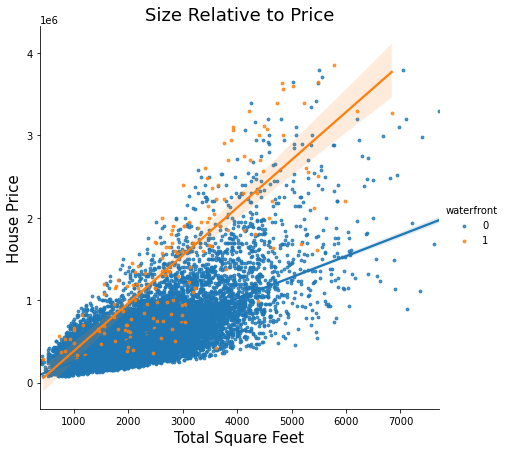

In [59]:
sns.lmplot(x='sqft_living', y='price', data=df, scatter_kws={'s':8}, hue='waterfront', height=6)

plt.title('Size Relative to Price', size=18)
plt.ylabel('House Price', size=15)
plt.xlabel('Total Square Feet', size=15)


plt.show()

In [60]:
# 116 different years within the dataset
df.yr_built.nunique()

116

In [61]:
# 0 null values
df.yr_built.isnull().sum()

0

In [62]:
# Check the oldest/newest year built

print(df.yr_built.min())
print(df.yr_built.max())

1900
2015


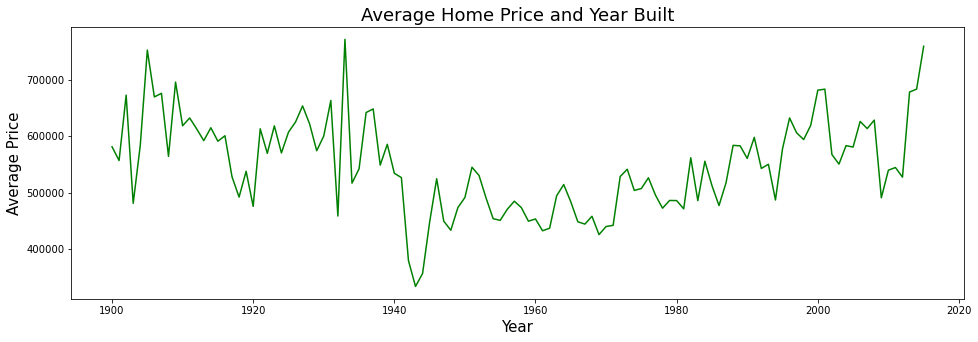

In [63]:
plt.figure(figsize=(16,5))

sns.lineplot(x='yr_built', y='price', data=df,linewidth=1.5, color='green', ci=None)

plt.title('Average Home Price and Year Built', size=18)
plt.ylabel('Average Price', size=15)
plt.xlabel('Year', size=15)

plt.show()

In [64]:
# let's graph the below

df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.00,-0.02,0.00,0.01,-0.01,-0.15,0.02,-0.00,0.01,-0.02,0.01,-0.01,-0.00,0.02,-0.02,-0.01,-0.00,0.02,-0.00,-0.14
price,-0.02,1.00,0.32,0.52,0.69,0.09,0.26,0.25,0.40,0.04,0.67,0.59,0.31,0.05,0.12,-0.05,0.32,0.02,0.60,0.07
bedrooms,0.00,0.32,1.00,0.53,0.60,0.04,0.18,-0.01,0.08,0.02,0.36,0.49,0.30,0.16,0.02,-0.16,-0.01,0.14,0.40,0.03
bathrooms,0.01,0.52,0.53,1.00,0.75,0.09,0.51,0.05,0.18,-0.13,0.66,0.68,0.27,0.51,0.05,-0.21,0.02,0.23,0.57,0.08
sqft_living,-0.01,0.69,0.60,0.75,1.00,0.18,0.36,0.09,0.27,-0.06,0.76,0.87,0.42,0.32,0.05,-0.20,0.05,0.25,0.76,0.18
sqft_lot,-0.15,0.09,0.04,0.09,0.18,1.00,-0.01,0.03,0.07,-0.01,0.12,0.19,0.02,0.06,0.01,-0.14,-0.10,0.25,0.17,0.77
floors,0.02,0.26,0.18,0.51,0.36,-0.01,1.00,0.02,0.03,-0.26,0.46,0.53,-0.25,0.49,0.01,-0.06,0.05,0.13,0.28,-0.02
waterfront,-0.00,0.25,-0.01,0.05,0.09,0.03,0.02,1.00,0.40,0.02,0.07,0.06,0.07,-0.03,0.09,0.03,-0.02,-0.04,0.08,0.03
view,0.01,0.40,0.08,0.18,0.27,0.07,0.03,0.40,1.00,0.05,0.24,0.16,0.27,-0.06,0.10,0.09,0.01,-0.08,0.28,0.07
condition,-0.02,0.04,0.02,-0.13,-0.06,-0.01,-0.26,0.02,0.05,1.00,-0.15,-0.16,0.18,-0.36,-0.06,0.00,-0.01,-0.11,-0.09,-0.00


In [65]:
df.columns.tolist()

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [66]:
# Let's put price as the last column for an easier interpretation of the correlation heatmap below.

cols = ['id',
 'date',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'price',]

In [67]:
df = df[cols]

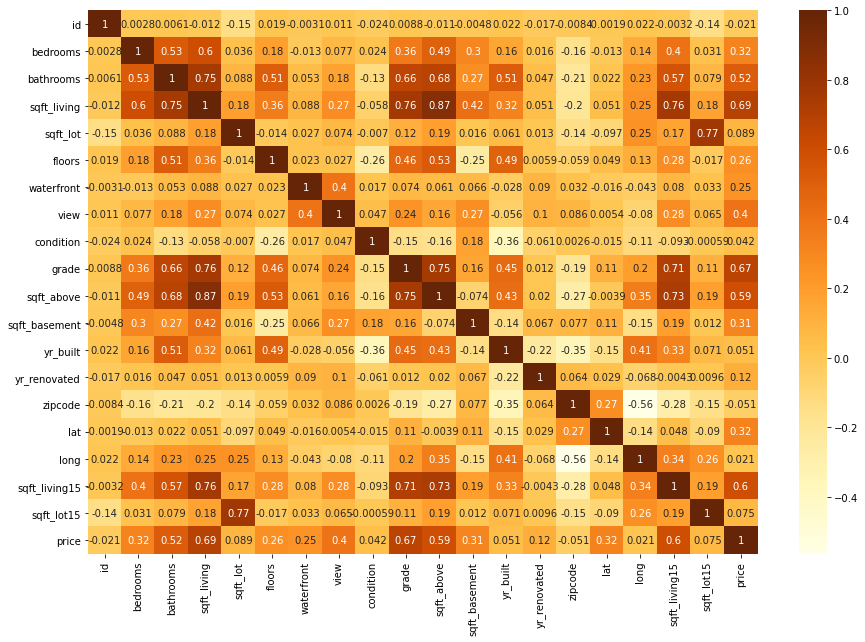

In [68]:
corr = df.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr, cmap='YlOrBr', annot=True)

plt.show()

In [69]:
high_corr = df.corr()['price'].sort_values(ascending=False)
high_corr

price            1.00
sqft_living      0.69
grade            0.67
sqft_living15    0.60
sqft_above       0.59
bathrooms        0.52
view             0.40
lat              0.32
bedrooms         0.32
sqft_basement    0.31
floors           0.26
waterfront       0.25
yr_renovated     0.12
sqft_lot         0.09
sqft_lot15       0.07
yr_built         0.05
condition        0.04
long             0.02
id              -0.02
zipcode         -0.05
Name: price, dtype: float64

Model Building 
The following models will be compared:

*Multi Linear Regression Model

*Lasso Linear Regression Model

*Random Forest Regression Model

*XGBoost Regression Model

*ExtraTreesRegressor Model

*Decision Tree Regressor Model

*Gradient Boosting Regressor Model

*Elastic Net Regressor Model

*Neural Network Regression Model

*Ada Boost Regressor Model

In [97]:
#pd.options.display.float_format = "{:.4f}".format # Lets show the results with 4 decimal places

dropped_vars = ['price','id', 'date','long']

X = df.drop(dropped_vars, axis='columns')
y = df['price']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### MULTI - LINEAR REGRESSION MODEL

In [100]:
model_MLR = LinearRegression()
model_MLR.fit(X_train, y_train)

LinearRegression()

In [101]:
yhat_pred_MLR = model_MLR.predict(X_test)

In [102]:
cross_val_MLR = round(np.mean(cross_val_score(model_MLR,X_train,y_train)),4)
R2_MLR = round(r2_score(y_test, yhat_pred_MLR),4)
MAE_MLR = int(mean_absolute_error(y_test,yhat_pred_MLR))

### LASSO - LINEAR REGRESSION MODEL 

In [103]:
model_LLR = Lasso()
model_LLR.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 252155928644331.9, tolerance: 189284188283.8179
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [104]:
yhat_pred_LLR = model_LLR.predict(X_test)

In [105]:
cross_val_LLR = round(np.mean(cross_val_score(model_LLR,X_train,y_train)),4)
R2_LLR = round(r2_score(y_test, yhat_pred_LLR),4)
MAE_LLR = int(mean_absolute_error(y_test,yhat_pred_LLR))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 203977265863996.88, tolerance: 153311694572.31036
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 206015568339784.0, tolerance: 156263373842.53845
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200142662904961.16, tolerance: 148766846067.76816
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceW

### RANDOM FOREST REGRESSOR MODEL

In [106]:
model_RFR = RandomForestRegressor(n_estimators=100)
model_RFR.fit(X_train, y_train)

RandomForestRegressor()

In [107]:
yhat_pred_RFR = model_RFR.predict(X_test)

In [108]:
cross_val_RFR = round(np.mean(cross_val_score(model_RFR,X_train,y_train)),4)
R2_RFR = round(r2_score(y_test, yhat_pred_RFR),4)
MAE_RFR = int(mean_absolute_error(y_test,yhat_pred_RFR))

### XGBOOST REGRESSOR MODEL 

In [109]:
model_xgboost = XGBRegressor()
model_xgboost.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [112]:
yhat_pred_xgboost = model_xgboost.predict(X_test)

In [111]:
cross_val_xgboost = round(np.mean(cross_val_score(model_xgboost,X_train,y_train)),4)
R2_xgboost = round(r2_score(y_test, yhat_pred_xgboost),4)
MAE_xgboost = int(mean_absolute_error(y_test,yhat_pred_xgboost))

### ExtraTreesRegressor MODEL

In [113]:
model_ETR = ExtraTreesRegressor()
model_ETR.fit(X_train, y_train)

ExtraTreesRegressor()

In [114]:
yhat_pred_ETR = model_ETR.predict(X_test)

In [115]:
cross_val_ETR = round(np.mean(cross_val_score(model_ETR,X_train,y_train)),4)
R2_ETR = round(r2_score(y_test, yhat_pred_ETR),4)
MAE_ETR = int(mean_absolute_error(y_test,yhat_pred_ETR))

### DECISION TREE REGRESSOR MODEL

In [116]:
model_DTR = DecisionTreeRegressor()
model_DTR.fit(X_train, y_train)

DecisionTreeRegressor()

In [117]:
yhat_pred_DTR = model_DTR.predict(X_test)

In [118]:
cross_val_DTR = round(np.mean(cross_val_score(model_DTR,X_train,y_train)),4)
R2_DTR = round(r2_score(y_test, yhat_pred_DTR),4)
MAE_DTR = int(mean_absolute_error(y_test,yhat_pred_DTR))

### GRADIENT BOOSTING REGRESSOR MODEL

In [119]:
model_GBR = GradientBoostingRegressor()
model_GBR.fit(X_train, y_train)

GradientBoostingRegressor()

In [120]:
yhat_pred_GBR = model_GBR.predict(X_test)

In [121]:
cross_val_GBR = round(np.mean(cross_val_score(model_GBR,X_train,y_train)),4)
R2_GBR = round(r2_score(y_test, yhat_pred_GBR),4)
MAE_GBR = int(mean_absolute_error(y_test,yhat_pred_GBR))

### ELASTIC NET REGRESSOR MODEL

In [122]:
model_ENR = ElasticNet()
model_ENR.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 385487225248844.4, tolerance: 189284188283.8179
  model = cd_fast.enet_coordinate_descent(


ElasticNet()

In [123]:
yhat_pred_ENR = model_ENR.predict(X_test)

In [124]:
cross_val_ENR = round(np.mean(cross_val_score(model_ENR,X_train,y_train)),4)
R2_ENR = round(r2_score(y_test, yhat_pred_ENR),4)
MAE_ENR = int(mean_absolute_error(y_test,yhat_pred_ENR))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 313358924883598.56, tolerance: 153311694572.31036
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 315475736339276.25, tolerance: 156263373842.53845
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 302733494958743.56, tolerance: 148766846067.76816
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

### MULTI-LAYER PERCEPTRON REGRESSOR MODEL

In [126]:
model_MLP = MLPRegressor()
model_MLP.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

In [127]:
yhat_pred_MLP = model_MLP.predict(X_test)

In [128]:
cross_val_MLP = round(np.mean(cross_val_score(model_MLP,X_train,y_train)),4)
R2_MLP = round(r2_score(y_test, yhat_pred_MLP),4)
MAE_MLP = int(mean_absolute_error(y_test,yhat_pred_MLP))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### ADA BOOST REGRESSOR - MODEL

In [129]:
model_ABR = AdaBoostRegressor()
model_ABR.fit(X_train, y_train)

AdaBoostRegressor()

In [130]:
yhat_pred_ABR = model_ABR.predict(X_test)

In [131]:
cross_val_ABR = round(np.mean(cross_val_score(model_ABR,X_train,y_train)),4)
R2_ABR = round(r2_score(y_test, yhat_pred_ABR),4)
MAE_ABR = int(mean_absolute_error(y_test,yhat_pred_ABR))

In [135]:
models = pd.DataFrame({
    'Model': ['Multi Linear Regression', 'Lasso Linear Regression', 'Random Forest Regression', 
              'XGBOOST Regression', 'ExtraTreesRegressor', 'Decision Tree Regressor', 
              'Gradient Boosting Regressor', 'Elastic Net Regressor', 
              'Neural Network Regression','Ada Boost Regressor'],
    'Mean Absolute Error': [MAE_MLR, MAE_LLR, MAE_RFR, 
              MAE_xgboost, MAE_ETR, MAE_DTR, 
              MAE_GBR, MAE_ENR, MAE_MLP, MAE_ABR],    
    'R2 Score': [R2_MLR, R2_LLR, R2_RFR, 
              R2_xgboost, R2_ETR, R2_DTR, 
              R2_GBR, R2_ENR, R2_MLP, R2_ABR],    
    'Cross Validation Score': [cross_val_MLR, cross_val_LLR, cross_val_RFR, 
              cross_val_xgboost, cross_val_ETR, cross_val_DTR, 
              cross_val_GBR, cross_val_ENR, cross_val_MLP, cross_val_ABR]})

models.sort_values(by='Cross Validation Score', ascending=False)

,Model,Mean Absolute Error,R2 Score,Cross Validation Score
3,XGBOOST Regression,69028,0.89,0.87
2,Random Forest Regression,72510,0.87,0.86
4,ExtraTreesRegressor,72024,0.88,0.85
6,Gradient Boosting Regressor,78051,0.87,0.85
0,Multi Linear Regression,123105,0.70,0.70
1,Lasso Linear Regression,123104,0.70,0.70
5,Decision Tree Regressor,103689,0.73,0.69
7,Elastic Net Regressor,141203,0.62,0.62
8,Neural Network Regression,157416,0.55,0.53
9,Ada Boost Regressor,269501,0.27,0.25


The XGBoost regression model had the strongest results based on the Cross Validation and R2 Score. Although, the Extra Trees Regressor, Random Forest Regression and Gradient Boosting Regressor are not very far behind. Another thing to note is that these models were not tuned. I'm positive that tuning the models would increase both the Cross Validation and R2 score and reduce the MAE for most, if not all models. I may revisit this notebook in the future and tune the models to examine the difference in results.